<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220704.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* regressor 
* customer analysis

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta
import os 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.impute import KNNImputer 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier 
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, accuracy_score, mean_squared_error 
import sklearn.datasets as skd

# regressor

In [11]:
raw = pd.read_csv('https://raw.githubusercontent.com/rashida048/Datasets/master/nhanes_2015_2016.csv')
raw.columns = [a.lower() for a in raw.columns]
raw.head()

,seqn,alq101,alq110,alq130,smq020,riagendr,ridageyr,ridreth1,dmdcitzn,dmdeduc2,...,bpxsy2,bpxdi2,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,hiq210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [10]:
raw.columns

Index(['seqn', 'alq101', 'alq110', 'alq130', 'smq020', 'riagendr', 'ridageyr',
       'ridreth1', 'dmdcitzn', 'dmdeduc2', 'dmdmartl', 'dmdhhsiz', 'wtint2yr',
       'sdmvpsu', 'sdmvstra', 'indfmpir', 'bpxsy1', 'bpxdi1', 'bpxsy2',
       'bpxdi2', 'bmxwt', 'bmxht', 'bmxbmi', 'bmxleg', 'bmxarml', 'bmxarmc',
       'bmxwaist', 'hiq210'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


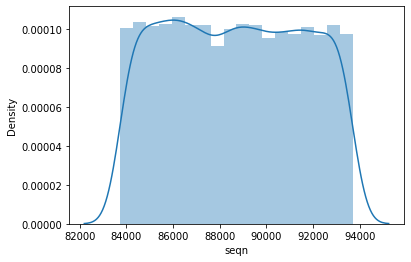

In [9]:
sns.distplot(raw['seqn'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


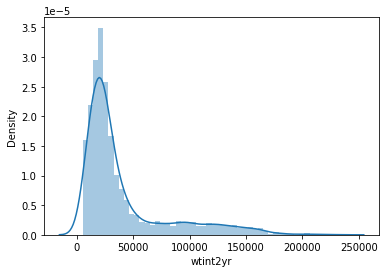

In [12]:
sns.distplot(raw.wtint2yr)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


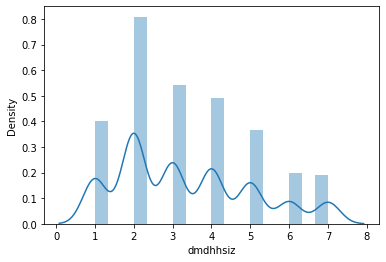

In [13]:
sns.distplot(raw['dmdhhsiz'])

In [15]:
x = raw[['alq101', 'alq110', 'alq130', 'smq020', 'riagendr', 'ridageyr',
       'ridreth1', 'dmdeduc2', 'dmdmartl', 'dmdhhsiz', 'wtint2yr',
       'sdmvpsu', 'sdmvstra', 'indfmpir', 'bpxsy1', 'bpxdi1', 'bpxsy2',
       'bpxdi2', 'bmxwt', 'bmxht', 'bmxbmi', 'bmxleg', 'bmxarml', 'bmxarmc',
       'bmxwaist', 'hiq210']]
y = raw['dmdhhsiz']

In [17]:
x.shape

(5735, 26)

In [16]:
x.isnull().sum()

alq101       527
alq110      4004
alq130      2356
smq020         0
riagendr       0
ridageyr       0
ridreth1       0
dmdeduc2     261
dmdmartl     261
dmdhhsiz       0
wtint2yr       0
sdmvpsu        0
sdmvstra       0
indfmpir     601
bpxsy1       334
bpxdi1       334
bpxsy2       200
bpxdi2       200
bmxwt         69
bmxht         62
bmxbmi        73
bmxleg       390
bmxarml      308
bmxarmc      308
bmxwaist     367
hiq210      1003
dtype: int64

In [133]:
x_ = x.drop(['alq110', 'alq130'], axis = 1)
x_.head()

,alq101,smq020,riagendr,ridageyr,ridreth1,dmdeduc2,dmdmartl,dmdhhsiz,wtint2yr,sdmvpsu,...,bpxsy2,bpxdi2,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,hiq210
0,1.0,1,1,62,3,5.0,1.0,2,134671.37,1,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,1.0,1,1,53,3,3.0,3.0,1,24328.56,1,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,1.0,1,1,78,3,3.0,1.0,2,12400.01,1,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,2.0,2,2,56,3,5.0,6.0,1,102718.00,1,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,2.0,2,2,42,4,4.0,3.0,5,17627.67,2,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [47]:
x_.columns

Index(['alq101', 'smq020', 'riagendr', 'ridageyr', 'ridreth1', 'dmdeduc2',
       'dmdmartl', 'dmdhhsiz', 'wtint2yr', 'sdmvpsu', 'sdmvstra', 'indfmpir',
       'bpxsy1', 'bpxdi1', 'bpxsy2', 'bpxdi2', 'bmxwt', 'bmxht', 'bmxbmi',
       'bmxleg', 'bmxarml', 'bmxarmc', 'bmxwaist', 'hiq210'],
      dtype='object')

In [29]:
chk_cnt = pd.melt(x_[['alq101', 'smq020', 'riagendr', 'ridreth1', 'dmdeduc2', 'dmdmartl', 'dmdhhsiz', 'sdmvpsu']].assign(idx = 1), id_vars = 'idx')
chk_cnt.head()

,idx,variable,value
0,1,alq101,1.0
1,1,alq101,1.0
2,1,alq101,1.0
3,1,alq101,2.0
4,1,alq101,2.0


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):
/usr/local/lib/python3.7/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 1049 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


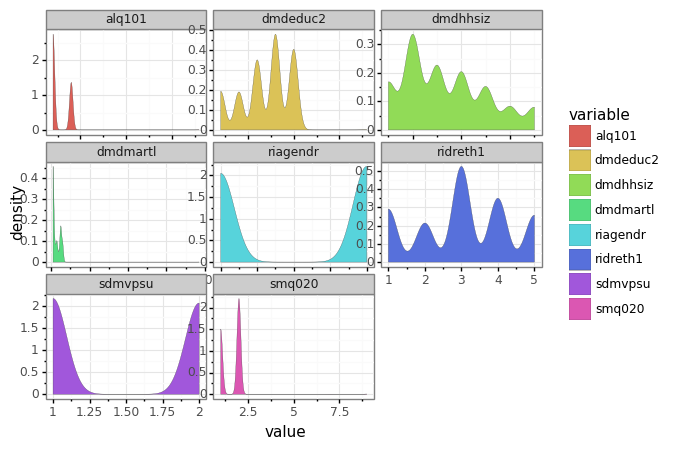

<ggplot: (8752246958133)>

In [57]:
(
    ggplot(chk_cnt, aes('value', fill = 'variable')) +
    gg.geom_density(color = '#333333', size = 0.1) +
    gg.facet_wrap('~variable', scales = 'free') +
    gg.theme_bw()
)

In [134]:
imputer = KNNImputer()
x_cols = x_.columns
x_ = imputer.fit_transform(x_)
x_ = pd.DataFrame(x_, columns = x_cols)
x_.head()

,alq101,smq020,riagendr,ridageyr,ridreth1,dmdeduc2,dmdmartl,dmdhhsiz,wtint2yr,sdmvpsu,...,bpxsy2,bpxdi2,bmxwt,bmxht,bmxbmi,bmxleg,bmxarml,bmxarmc,bmxwaist,hiq210
0,1.0,1.0,1.0,62.0,3.0,5.0,1.0,2.0,134671.37,1.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,1.0,1.0,1.0,53.0,3.0,3.0,3.0,1.0,24328.56,1.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,1.8
2,1.0,1.0,1.0,78.0,3.0,3.0,1.0,2.0,12400.01,1.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,2.0,2.0,2.0,56.0,3.0,5.0,6.0,1.0,102718.00,1.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,2.0,2.0,2.0,42.0,4.0,4.0,3.0,5.0,17627.67,2.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [135]:
name1 = ['alq101', 'smq020', 'riagendr', 'ridreth1', 'dmdmartl', 'dmdhhsiz', 'sdmvpsu']
name2 = ['dmdeduc2', 'wtint2yr', 'sdmvstra', 'indfmpir',
       'bpxsy1', 'bpxdi1', 'bpxsy2', 'bpxdi2', 'bmxwt', 'bmxht', 'bmxbmi',
       'bmxleg', 'bmxarml', 'bmxarmc', 'bmxwaist', 'hiq210']

In [136]:
x_[name1].head() # ridageyr

,alq101,smq020,riagendr,ridreth1,dmdmartl,dmdhhsiz,sdmvpsu
0,1.0,1.0,1.0,3.0,1.0,2.0,1.0
1,1.0,1.0,1.0,3.0,3.0,1.0,1.0
2,1.0,1.0,1.0,3.0,1.0,2.0,1.0
3,2.0,2.0,2.0,3.0,6.0,1.0,1.0
4,2.0,2.0,2.0,4.0,3.0,5.0,2.0


In [137]:
x_ = pd.get_dummies(x_, columns = name1)
x_.head()

,ridageyr,dmdeduc2,wtint2yr,sdmvstra,indfmpir,bpxsy1,bpxdi1,bpxsy2,bpxdi2,bmxwt,...,dmdmartl_77.0,dmdhhsiz_1.0,dmdhhsiz_2.0,dmdhhsiz_3.0,dmdhhsiz_4.0,dmdhhsiz_5.0,dmdhhsiz_6.0,dmdhhsiz_7.0,sdmvpsu_1.0,sdmvpsu_2.0
0,62.0,5.0,134671.37,125.0,4.39,128.0,70.0,124.0,64.0,94.8,...,0,0,1,0,0,0,0,0,1,0
1,53.0,3.0,24328.56,125.0,1.32,146.0,88.0,140.0,88.0,90.4,...,0,1,0,0,0,0,0,0,1,0
2,78.0,3.0,12400.01,131.0,1.51,138.0,46.0,132.0,44.0,83.4,...,0,0,1,0,0,0,0,0,1,0
3,56.0,5.0,102718.00,131.0,5.00,132.0,72.0,134.0,68.0,109.8,...,0,1,0,0,0,0,0,0,1,0
4,42.0,4.0,17627.67,126.0,1.23,100.0,70.0,114.0,54.0,55.2,...,0,0,0,0,0,1,0,0,0,1


In [139]:
x_ = x_.drop(['ridageyr'], axis = 1)

In [140]:
x_tr, x_te, y_tr, y_te = train_test_split(x_, y, train_size = .7)

In [141]:
name3 = ['hiq210', 'alq101_1.0', 'alq101_1.2',
       'alq101_1.4', 'alq101_1.6', 'alq101_1.8', 'alq101_2.0', 'alq101_3.0',
       'alq101_3.2', 'alq101_9.0', 'smq020_1.0', 'smq020_2.0', 'smq020_7.0',
       'smq020_9.0', 'riagendr_1.0', 'riagendr_2.0', 'ridreth1_1.0',
       'ridreth1_2.0', 'ridreth1_3.0', 'ridreth1_4.0', 'ridreth1_5.0',
       'dmdmartl_1.0', 'dmdmartl_1.2', 'dmdmartl_1.4', 'dmdmartl_1.6',
       'dmdmartl_1.8', 'dmdmartl_2.0', 'dmdmartl_2.2', 'dmdmartl_2.4',
       'dmdmartl_2.6', 'dmdmartl_2.8', 'dmdmartl_3.0', 'dmdmartl_3.2',
       'dmdmartl_3.4', 'dmdmartl_3.6', 'dmdmartl_3.8', 'dmdmartl_4.0',
       'dmdmartl_4.2', 'dmdmartl_4.4', 'dmdmartl_4.6', 'dmdmartl_4.8',
       'dmdmartl_5.0', 'dmdmartl_5.2', 'dmdmartl_5.4', 'dmdmartl_6.0',
       'dmdmartl_16.2', 'dmdmartl_18.0', 'dmdmartl_77.0', 'dmdhhsiz_1.0',
       'dmdhhsiz_2.0', 'dmdhhsiz_3.0', 'dmdhhsiz_4.0', 'dmdhhsiz_5.0',
       'dmdhhsiz_6.0', 'dmdhhsiz_7.0', 'sdmvpsu_1.0', 'sdmvpsu_2.0']

In [142]:
scaler = StandardScaler()
x_tr_std = scaler.fit_transform(x_tr[name2])
x_te_std = scaler.transform(x_te[name2])

In [143]:
pd.DataFrame(x_tr_std, columns = name2).shape, x_tr[name3].shape

((4014, 16), (4014, 57))

In [144]:
x_tr_std = pd.concat([x_tr[name3].reset_index(), pd.DataFrame(x_tr_std, columns = name2)], axis = 1)
x_te_std = pd.concat([x_te[name3].reset_index(), pd.DataFrame(x_te_std, columns = name2)], axis = 1)

In [145]:
fit_rf = RandomForestClassifier().fit(x_tr, y_tr)
fit_rf_std = RandomForestClassifier().fit(x_tr_std, y_tr)

In [150]:
np.setdiff1d(x_tr_std.columns, x_te_std.columns)


array([], dtype=object)

In [152]:
x_tr.shape, x_te_std.shape

((4014, 72), (1721, 74))

In [175]:
pred_rf = fit_rf.predict(x_te)

proba_rf = fit_rf.predict_proba(x_te)[:,-1]

In [154]:
accuracy_score(y_te, pred_rf)

1.0